# 2022 UKRAINE AND RUSSIA WAR
Predict the percentage of people who survived the war in 2022

# Loading Dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read Data

In [2]:
df=pd.read_csv("C:\\Users\\Shenese\\Desktop\\russia_losses_equipment.csv")
#Show data
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [3]:
#Info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   45 non-null     object 
 1   day                    45 non-null     int64  
 2   aircraft               45 non-null     int64  
 3   helicopter             45 non-null     int64  
 4   tank                   45 non-null     int64  
 5   APC                    45 non-null     int64  
 6   field artillery        45 non-null     int64  
 7   MRL                    45 non-null     int64  
 8   military auto          45 non-null     int64  
 9   fuel tank              45 non-null     int64  
 10  drone                  45 non-null     int64  
 11  naval ship             45 non-null     int64  
 12  anti-aircraft warfare  45 non-null     int64  
 13  special equipment      26 non-null     float64
 14  mobile SRBM system     16 non-null     float64
dtypes: float

In [4]:
#Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,45.0,24.000000,13.133926,2.0,13.0,24.0,35.00,46.0
aircraft,45.0,89.866667,45.086583,10.0,48.0,95.0,131.00,152.0
helicopter,45.0,96.577778,40.575121,7.0,80.0,115.0,131.00,137.0
tank,45.0,450.133333,181.772785,80.0,303.0,466.0,605.00,722.0
APC,45.0,1385.222222,396.810344,516.0,1036.0,1470.0,1723.00,1911.0
field artillery,45.0,209.866667,100.564678,49.0,120.0,213.0,305.00,342.0
MRL,45.0,71.333333,29.733666,4.0,56.0,72.0,96.00,108.0
military auto,45.0,832.911111,398.363517,100.0,474.0,914.0,1184.00,1384.0
fuel tank,45.0,66.355556,7.317959,60.0,60.0,60.0,75.00,76.0
drone,45.0,39.333333,39.616342,0.0,7.0,17.0,81.00,112.0


In [5]:
#Missing Data
df.isnull().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

# Visualize Data

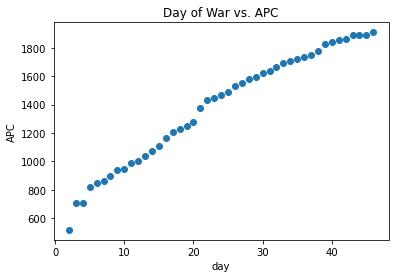

In [9]:
#Create a scatter plot to view the relationship between two varaibles:
plt.scatter(df.day,df.APC)
plt.title('Day of War vs. APC')
plt.xlabel('day')
plt.ylabel('APC')
plt.show()

From the plot we can see that the relationship does not appear linear.
As day increases the armored vehicle used to transport personnel increases in a linear fashion.

<AxesSubplot:>

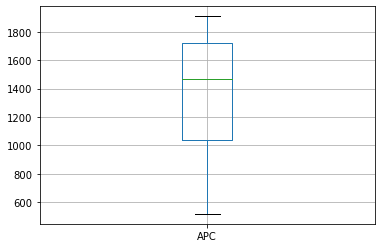

In [11]:
#Create a boxplot to visualize the distribution of APC scores and check for outliers
df.boxplot(column=['APC'])

There are no tiny circles in the boxplot, which means there are no outliers in our dataset

# MODEL BUILDING

once confirm that our relationship between variables are linear and that there are no outliers present.

We can proceed to fit a simple linear regression model using Day as the exploratory variable and APC  as the response variable.

In [12]:
#Split data into exploratory data and response variable:


In [22]:
#Define response variable:
x=df[['day']]

In [24]:
#Define explanatory variable:
y=df['APC']

In [26]:
#Instantiate model
LR=LinearRegression()

In [28]:
#Fit model
LR.fit(x,y)

LinearRegression()

In [30]:
LR.coef_

array([29.81370224])

In [31]:
LR.intercept_

669.6933684672813

From the model summary we can see that the fitted regression equation is:
    APC=669.6934+29.814*(days)

This means that each additional day is associated with the average.
Increase in Day score of 29.514 points and intercept value 669.6934 tells us the average.
We can look at what will be a predicted APC if war went on for 10 days?

In [32]:
war_apc=LR.predict([[10]])

In [33]:
war_apc

array([967.83039087])

People who went to war for 10 days is expected to receive an APC of 967.830

# Saving Model

In [35]:
import joblib
joblib.dump(LR, 'lr_model.pkl')

['lr_model.pkl']